In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

In [2]:
cdmx = pd.read_csv("dat/radiacion.csv",usecols=[0,5],names=['tiempo','Ig'],
                   skiprows=1,parse_dates=True,index_col=0)

Text(0, 0.5, 'Irradiancia [$W/m^2$]')

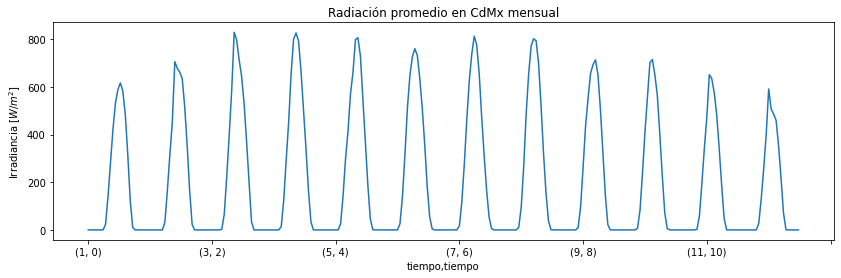

In [3]:
cdmx.Ig.groupby([cdmx.index.month,cdmx.index.hour]).mean().plot(figsize=(14,4))
plt.title("Radiación promedio en CdMx mensual")
plt.ylabel("Irradiancia [$W/m^2$]")


In [4]:
#Crea una columna llamada sec en segundos para poder realizar la integral
cdmx['sec'] = (cdmx.index.values
            - cdmx.index.values.astype('datetime64[D]'))/np.timedelta64(1,'s')

In [5]:
E = integrate.simps(cdmx.Ig,cdmx.sec)/3.6e6
print("La energía solar incidente en 1 m^2 en la CdMx durante un año es de",round(E,3),
      "kWh que son ",round(E/12,3)," kWh mensuales en promedio")

La energía solar incidente en 1 m^2 en la CdMx durante un año es de 1809.267 kWh que son  150.772  kWh mensuales en promedio
